In [95]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
#import the data from the CSV file
file_path = '/Users/TULASI/desktop/bank.csv'
bank_data=pd.read_csv('bank.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [97]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [98]:
print("The dataset consists of {rows} rows.".format(rows = len(bank_data)))

The dataset consists of 4521 rows.


In [99]:
missingvalues = bank_data.isnull().mean()*100

missingvalues.sum()

0.0

<AxesSubplot:title={'center':'Deposit wrt Job'}>

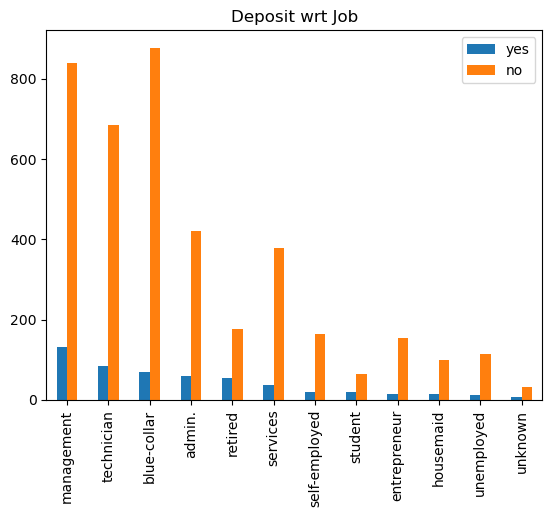

In [100]:
#visualisations on the data
newdata = pd.DataFrame()

newdata['yes'] = bank_data[bank_data['y'] == 'yes']['job'].value_counts()
newdata['no'] = bank_data[bank_data['y'] == 'no']['job'].value_counts()

newdata.plot.bar(title = 'Deposit wrt Job')

<AxesSubplot:title={'center':'Deposit wrt marital status'}>

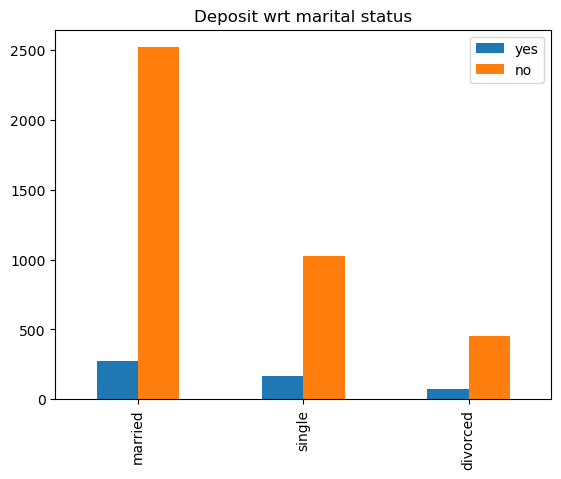

In [101]:
newdata = pd.DataFrame()

newdata['yes'] = bank_data[bank_data['y'] == 'yes']['marital'].value_counts()
newdata['no'] = bank_data[bank_data['y'] == 'no']['marital'].value_counts()

newdata.plot.bar(title = 'Deposit wrt marital status')

<AxesSubplot:title={'center':'Deposit wrt education'}>

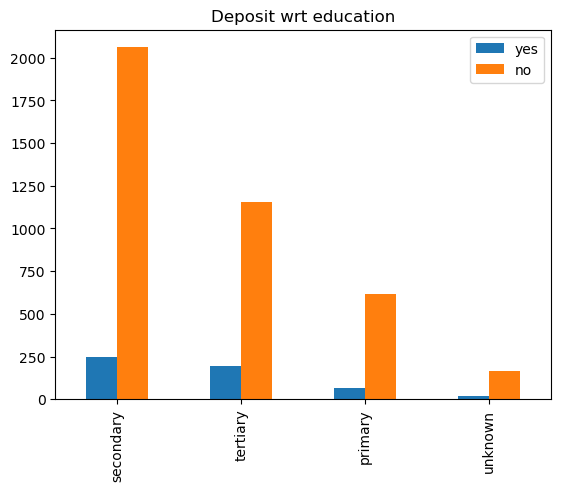

In [102]:
newdata = pd.DataFrame()

newdata['yes'] = bank_data[bank_data['y'] == 'yes']['education'].value_counts()
newdata['no'] = bank_data[bank_data['y'] == 'no']['education'].value_counts()

newdata.plot.bar(title = 'Deposit wrt education')

<AxesSubplot:title={'center':'Deposit wrt contact'}>

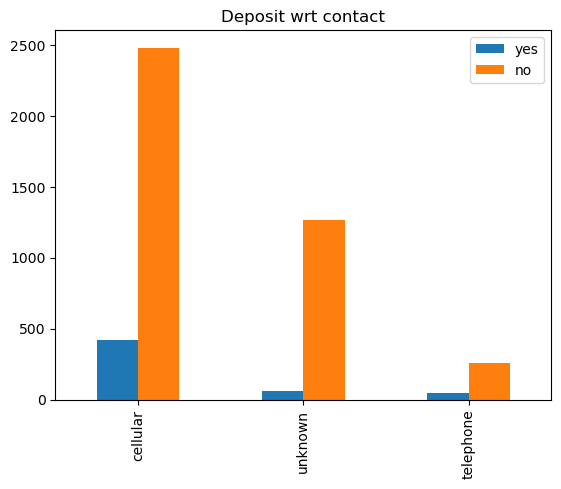

In [103]:
newdata = pd.DataFrame()

newdata['yes'] = bank_data[bank_data['y'] == 'yes']['contact'].value_counts()
newdata['no'] = bank_data[bank_data['y'] == 'no']['contact'].value_counts()

newdata.plot.bar(title = 'Deposit wrt contact')

<AxesSubplot:>

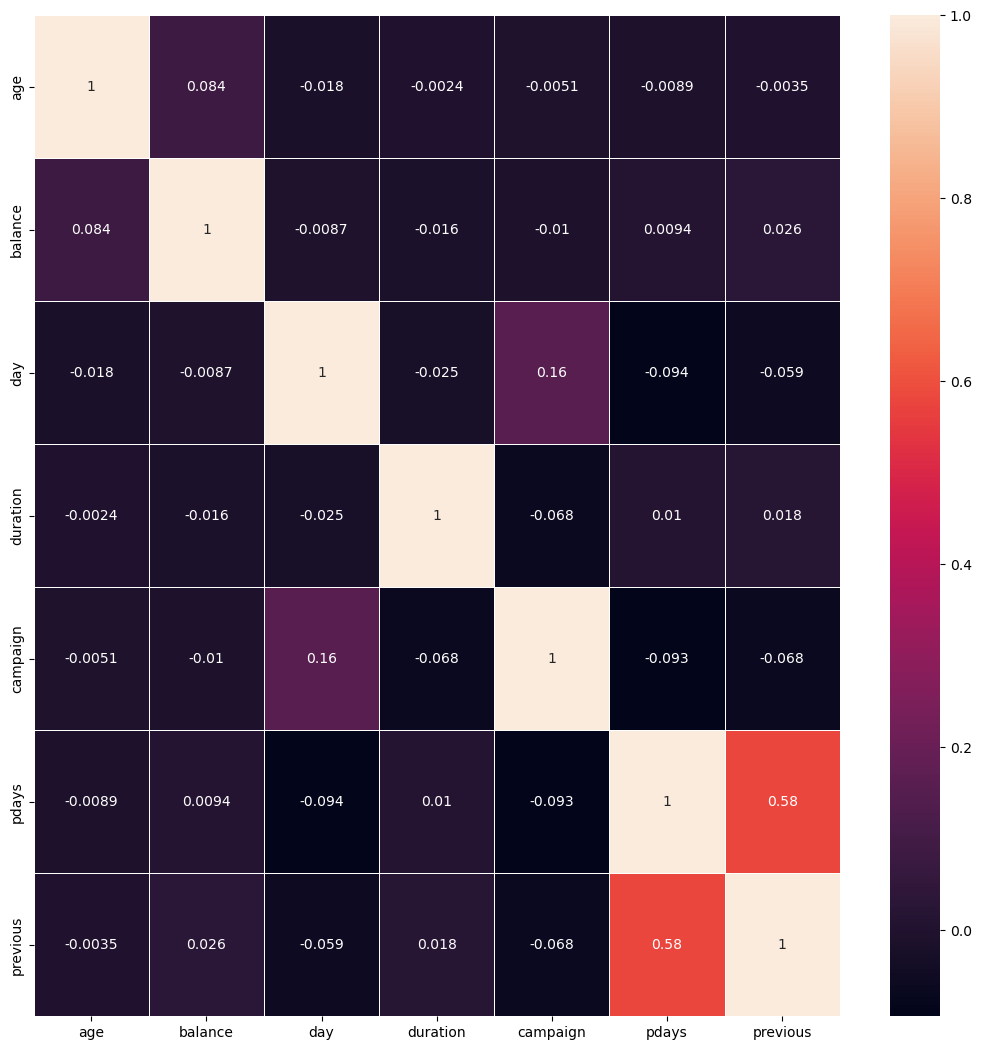

In [104]:
#correlations on the data
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(bank_data.corr(), annot=True, linewidths=.5, ax=ax)

<AxesSubplot:title={'center':'Deposit value counts'}>

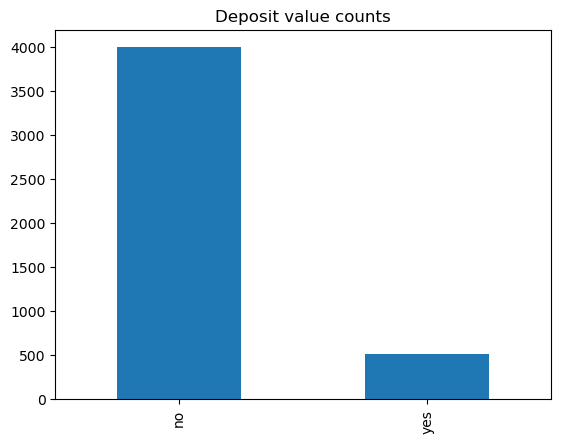

In [105]:
#count on the data
deposit_count = bank_data['y'].value_counts()
deposit_count.plot.bar(title = 'Deposit value counts')

In [106]:
#labelling the target coloumn of the data
bank_data['y']=bank_data['y'].map({'yes':1,'no':0})


In [107]:
#onehot encoding for the categorical coloumn
bank_newdata =pd.get_dummies(bank_data,drop_first=True)

In [108]:
bank_newdata

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [109]:
#target and input features
X_input = bank_newdata.drop(['y'], axis=1)
y_target = bank_newdata['y']

In [110]:
#oversampling technique
from imblearn.over_sampling import SMOTE

smote_technique = SMOTE()
X_new, y_new = smote_technique.fit_resample(X_input, y_target)

print("After applying SMOTE technique:")
print("Class 0:", sum(y_new == 0))
print("Class 1:", sum(y_new == 1))

After applying SMOTE technique:
Class 0: 4000
Class 1: 4000


In [111]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_input,y_target, test_size=0.25, random_state=42)

In [120]:
#standardize the data
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()

X_train=standardize.fit_transform(X_train)
X_test = standardize.transform(X_test)

In [113]:
#perform modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
model_1.score(X_test ,y_test)
predicted_1 = model_1.predict(X_test)

print(accuracy_score(y_test,predicted_1))
print(classification_report(y_test,predicted_1))


0.8983200707338639
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1006
           1       0.58      0.30      0.40       125

    accuracy                           0.90      1131
   macro avg       0.75      0.64      0.67      1131
weighted avg       0.88      0.90      0.88      1131



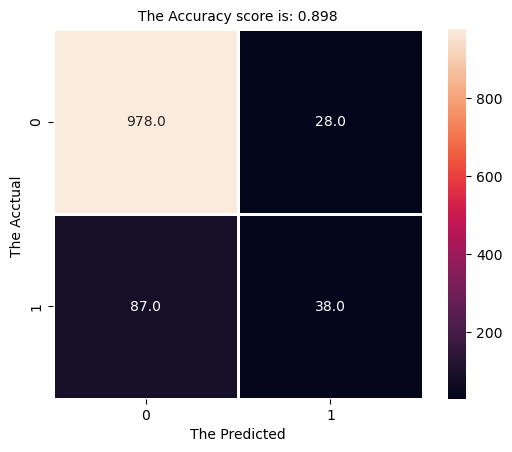

In [114]:
#evaluation of model
score=round(accuracy_score(y_test,predicted_1),3)
cm_1 = confusion_matrix
cm_1 =cm_1(y_test,predicted_1)
sns.heatmap(cm_1, annot=True,fmt=".1f",linewidths=2,square=True)
plt.ylabel('The Acctual ')
plt.xlabel('The Predicted')
plt.title('The Accuracy score is: {0}'.format(score),size=10)
plt.show()

In [115]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=500, max_depth=14,random_state=50)
model_2.fit(X_train, y_train)
model_2.score(X_test ,y_test)
predicted_2 = model_2.predict(X_test)

print(accuracy_score(y_test,predicted_2))
print(classification_report(y_test,predicted_2))


0.9018567639257294
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1006
           1       0.65      0.24      0.35       125

    accuracy                           0.90      1131
   macro avg       0.78      0.61      0.65      1131
weighted avg       0.88      0.90      0.88      1131



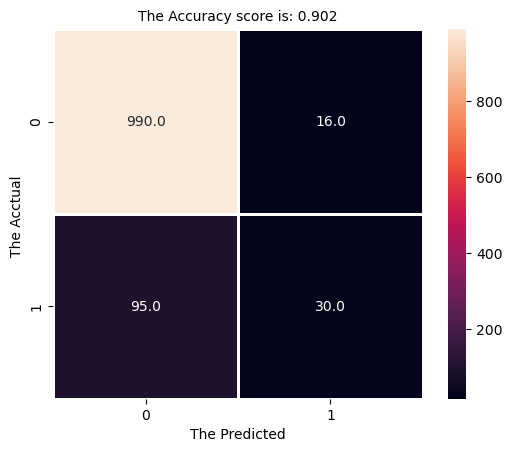

In [116]:
score=round(accuracy_score(y_test,predicted_2),3)
cm_2 = confusion_matrix
cm_2 =cm_2(y_test,predicted_2)
sns.heatmap(cm_2, annot=True,fmt=".1f",linewidths=2,square=True)
plt.ylabel('The Acctual ')
plt.xlabel('The Predicted')
plt.title('The Accuracy score is: {0}'.format(score),size=10)
plt.show()

In [117]:
from xgboost import XGBClassifier

model_3 =XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=10)
model_3.fit(X_train, y_train)
model_3.score(X_test ,y_test)
predicted_3 = model_3.predict(X_test)

print(accuracy_score(y_test,predicted_3))
print(classification_report(y_test,predicted_3))

0.9018567639257294
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1006
           1       0.59      0.38      0.46       125

    accuracy                           0.90      1131
   macro avg       0.76      0.68      0.70      1131
weighted avg       0.89      0.90      0.89      1131



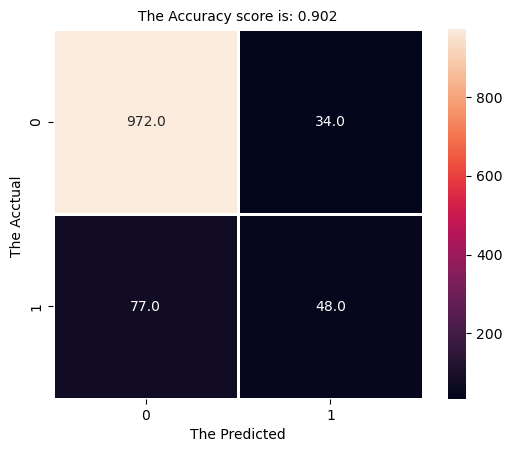

In [118]:
score=round(accuracy_score(y_test,predicted_3),3)
cm_3 = confusion_matrix
cm_3 =cm_3(y_test,predicted_3)
sns.heatmap(cm_3, annot=True,fmt=".1f",linewidths=2,square=True)
plt.ylabel('The Acctual ')
plt.xlabel('The Predicted')
plt.title('The Accuracy score is: {0}'.format(score),size=10)
plt.show()
